# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
 !pip install config

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
     
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
# query_url = f"{url}appid={weather_api_key }&q={city}&units={units}"
# #
# # Get weather data
# weather_response = requests.get(query_url)
#weather_json = weather_response.json()

# print(weather_json)

lat = []
lon = []
temperatures = []
wind_speed = []
clouds = []
humidity = []
country = []
date = []
cities_found = []

city_count = 0

for city in cities:
     
   
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

    
        lon.append(weather_json["coord"]["lon"])
        lat.append(weather_json["coord"]["lat"])
        
        temperatures.append(weather_json["main"]["temp"])
        wind_speed.append(weather_json["wind"]["speed"])
        clouds.append(weather_json["clouds"]["all"])
        humidity.append(weather_json["main"]["humidity"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        cities_found.append(city)
        
        city_count = city_count + 1
        print("city: " + city + " " + str(city_count) )
    except:
        print("not found " + city)
    
    


city: ponta do sol 1
city: nova prata 2
city: verkhnedneprovskiy 3
city: bambous virieux 4
city: hithadhoo 5
city: sulangan 6
city: tasiilaq 7
city: ushuaia 8
city: new norfolk 9
city: butaritari 10
city: kapaa 11
city: vangaindrano 12
city: port elizabeth 13
city: opelousas 14
city: navahrudak 15
city: mahebourg 16
city: aberdeen 17
not found grand river south east
not found richard toll
city: ayr 18
city: thompson 19
city: busselton 20
city: half moon bay 21
city: albany 22
city: tiksi 23
city: tuatapere 24
city: dunedin 25
city: hobart 26
city: longyearbyen 27
city: sontra 28
city: bandarban 29
not found ust-kamchatsk
city: kaitangata 30
city: zhigansk 31
city: tilichiki 32
city: bredasdorp 33
city: tailai 34
city: puerto ayora 35
city: abu samrah 36
city: praia 37
not found mys shmidta
city: romilly-sur-seine 38
city: nikolskoye 39
not found illoqqortoormiut
city: te anau 40
city: jamestown 41
city: carnarvon 42
city: derzhavinsk 43
city: russell 44
city: chokurdakh 45
city: komsom

city: severo-kurilsk 382
city: oparino 383
city: alta floresta 384
city: ouadda 385
city: lais 386
city: wasilla 387
city: vao 388
city: katsuura 389
city: dongsheng 390
city: kanniyakumari 391
city: nizwa 392
city: concarneau 393
city: okmulgee 394
city: almere 395
city: asau 396
city: nouadhibou 397
city: tchaourou 398
city: kharan 399
city: ketchikan 400
city: yablonovo 401
city: tigzirt 402
city: palmer 403
city: campbell river 404
city: deputatskiy 405
city: sao geraldo do araguaia 406
city: bemidji 407
city: akcakoca 408
city: kudat 409
city: pacifica 410
city: mombetsu 411
city: chiampo 412
city: saldanha 413
city: pringsewu 414
not found khonuu
not found rolim de moura
city: morant bay 415
city: mananjary 416
city: teknaf 417
city: ballina 418
city: mocuba 419
city: goure 420
city: canete 421
city: vila 422
not found aflu
not found abiy adi
city: conde 423
city: souillac 424
city: norman wells 425
city: asfi 426
city: jacareacanga 427
city: nome 428
city: geraldton 429
city: li

In [6]:
city_df = pd.DataFrame({
                        "City Name": cities_found,
                        "Latitude": lat,
                        "Longitude": lon,
                        "Temperature": temperatures,  
                        "Wind Speed": wind_speed,
                        "Cloudiness": clouds,
                        "Humidity": humidity,
                        "Country": country,
    
                        "Date": date
                        
                        
                        })    


    
city_df


,City Name,Latitude,Longitude,Temperature,Wind Speed,Cloudiness,Humidity,Country,Date
0,ponta do sol,32.6667,-17.1000,61.43,11.05,32,81,PT,1650919384
1,nova prata,-28.7839,-51.6100,76.59,2.93,93,83,BR,1650919384
2,verkhnedneprovskiy,54.9813,33.3457,45.50,3.91,99,93,RU,1650919384
3,bambous virieux,-20.3428,57.7575,73.65,12.66,40,88,MU,1650919385
4,hithadhoo,-0.6000,73.0833,83.52,6.89,80,74,MV,1650919385
...,...,...,...,...,...,...,...,...,...
557,daura,11.5538,11.4085,91.38,11.21,33,33,NG,1650919612
558,ocara,-4.4908,-38.5967,76.32,3.56,66,85,BR,1650919612
559,gejiu,23.3060,103.1635,56.07,1.57,0,57,CN,1650919613
560,hami,42.8000,93.4500,61.21,24.54,98,25,CN,1650919613


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# city_data_to_load = "cities.csv"

# city_data = pd.read_csv(city_data_to_load)


In [8]:
city_df.to_csv(r'City.csv', index = False)






## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity_count = city_df.loc[city_df["Humidity"]> 100]
    
(len(humidity_count))    

0

In [10]:
#  Get the indices of cities that have humidity over 100%.
# THERE AREN"T ANY


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
humidity_count = city_df.loc[city_df["Humidity"]<= 100]
humidity_count

,City Name,Latitude,Longitude,Temperature,Wind Speed,Cloudiness,Humidity,Country,Date
0,ponta do sol,32.6667,-17.1000,61.43,11.05,32,81,PT,1650919384
1,nova prata,-28.7839,-51.6100,76.59,2.93,93,83,BR,1650919384
2,verkhnedneprovskiy,54.9813,33.3457,45.50,3.91,99,93,RU,1650919384
3,bambous virieux,-20.3428,57.7575,73.65,12.66,40,88,MU,1650919385
4,hithadhoo,-0.6000,73.0833,83.52,6.89,80,74,MV,1650919385
...,...,...,...,...,...,...,...,...,...
557,daura,11.5538,11.4085,91.38,11.21,33,33,NG,1650919612
558,ocara,-4.4908,-38.5967,76.32,3.56,66,85,BR,1650919612
559,gejiu,23.3060,103.1635,56.07,1.57,0,57,CN,1650919613
560,hami,42.8000,93.4500,61.21,24.54,98,25,CN,1650919613


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

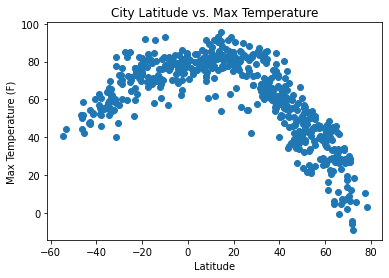

In [13]:
                                 
plt.scatter(city_df["Latitude"],city_df["Temperature"])  
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

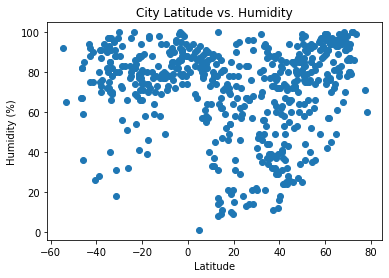

In [14]:
plt.scatter(city_df["Latitude"],city_df["Humidity"])  
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

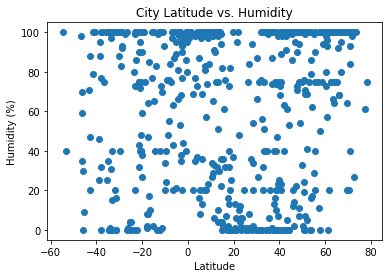

In [15]:
plt.scatter(city_df["Latitude"],city_df["Cloudiness"])  
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Wind Speed Plot

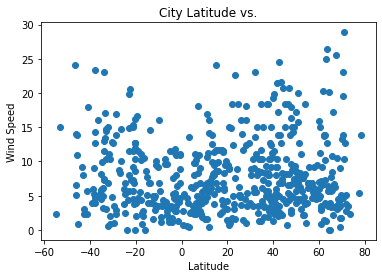

In [16]:
plt.scatter(city_df["Latitude"],city_df["Wind Speed"])  
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('City Latitude vs.')
plt.show()

## Linear Regression

In [17]:
northern_hemisphere_df = city_df.loc[city_df["Latitude"] >= 0]
southern_hemisphere_df = city_df.loc[city_df["Latitude"] <= 0]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between weight and average tumor volume
is -0.88.


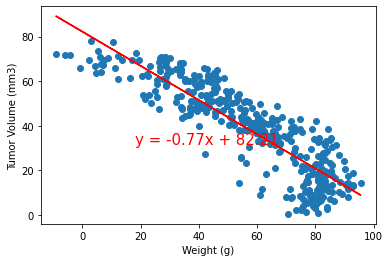

In [18]:
x = northern_hemisphere_df['Temperature']
y = northern_hemisphere_df['Latitude']


correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(18,32),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between weight and average tumor volume
is 0.75.


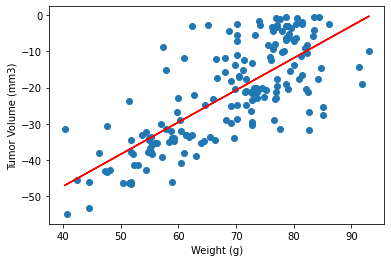

In [19]:
x = southern_hemisphere_df ['Temperature']
y = southern_hemisphere_df ['Latitude']


correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(18,32),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between weight and average tumor volume
is 0.25.


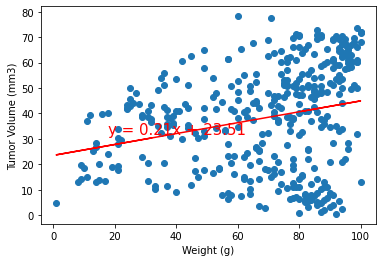

In [20]:
x = northern_hemisphere_df ['Humidity']
y = northern_hemisphere_df ['Latitude']


correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(18,32),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between weight and average tumor volume
is 0.2.


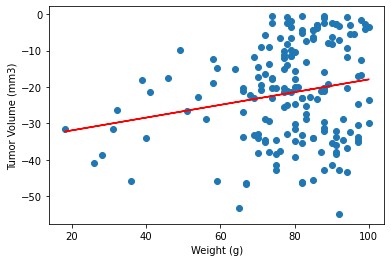

In [21]:
x = southern_hemisphere_df ['Humidity']
y = southern_hemisphere_df ['Latitude']


correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(18,32),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between weight and average tumor volume
is 0.25.


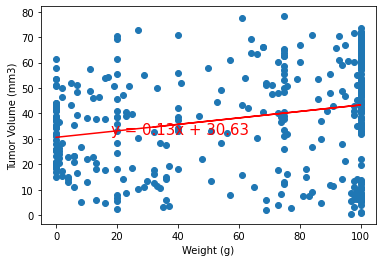

In [22]:
x = northern_hemisphere_df ['Cloudiness']
y = northern_hemisphere_df ['Latitude']


correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(18,32),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between weight and average tumor volume
is 0.12.


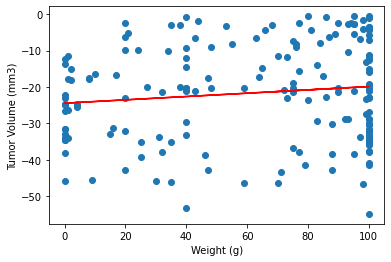

In [23]:
x = southern_hemisphere_df ['Cloudiness']
y = southern_hemisphere_df ['Latitude']


correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(18,32),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between weight and average tumor volume
is 0.09.


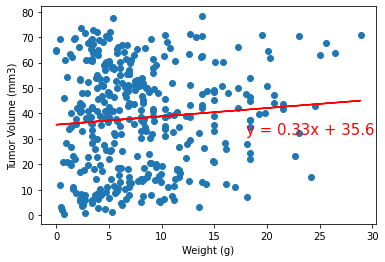

In [24]:
x = northern_hemisphere_df ['Wind Speed']
y = northern_hemisphere_df ['Latitude']


correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(18,32),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between weight and average tumor volume
is -0.25.


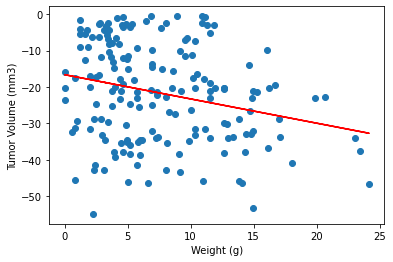

In [25]:
x = southern_hemisphere_df ['Wind Speed']
y = southern_hemisphere_df ['Latitude']


correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(18,32),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()